In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import h5py

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.optimizers import Adam

%matplotlib inline

In [2]:
import pickle

train = pickle.load( open("train.p", "rb") )
test = pickle.load( open("test.p", "rb") )

x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
shape = x_train.shape
x_train = x_train.reshape( (shape[0], shape[1], shape[2], 1) )
shape = x_test.shape
x_test = x_test.reshape( (shape[0], shape[1], shape[2], 1) )
x_train.shape[1:]

(30, 60, 1)

In [3]:
model = Sequential()

model.add( Conv2D(16, (3, 3), activation='relu', input_shape=x_train.shape[1:]) )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Conv2D(32, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(3, 3)) )

model.add( Flatten() )
model.add( Dense(32, activation='relu') )
model.add( Dense(16, activation='relu'))
model.add( Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 58, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 29, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 27, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 9, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                36896     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
__________

In [5]:
model.fit(x_train, y_train,
          batch_size=512,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 30000 samples
Epoch 1/10
50000/50000 [==============================] - 123s 2ms/step - loss: 0.6931 - acc: 0.5055 - val_loss: 0.6928 - val_acc: 0.5087
Epoch 2/10
50000/50000 [==============================] - 147s 3ms/step - loss: 0.6922 - acc: 0.5305 - val_loss: 0.6914 - val_acc: 0.5531
Epoch 3/10
50000/50000 [==============================] - 136s 3ms/step - loss: 0.6890 - acc: 0.5826 - val_loss: 0.6855 - val_acc: 0.6059
Epoch 4/10
50000/50000 [==============================] - 155s 3ms/step - loss: 0.6770 - acc: 0.6348 - val_loss: 0.6654 - val_acc: 0.6537
Epoch 5/10
50000/50000 [==============================] - 91s 2ms/step - loss: 0.6474 - acc: 0.6554 - val_loss: 0.6279 - val_acc: 0.6570
Epoch 6/10
50000/50000 [==============================] - 83s 2ms/step - loss: 0.6094 - acc: 0.6760 - val_loss: 0.5926 - val_acc: 0.6853
Epoch 7/10
50000/50000 [==============================] - 79s 2ms/step - loss: 0.5777 - acc: 0.7027 - val_loss: 0.5651 - val

In [23]:
import h5py
from importlib import reload

keras.models = reload(keras.models)

In [24]:
model.save("find_sim")

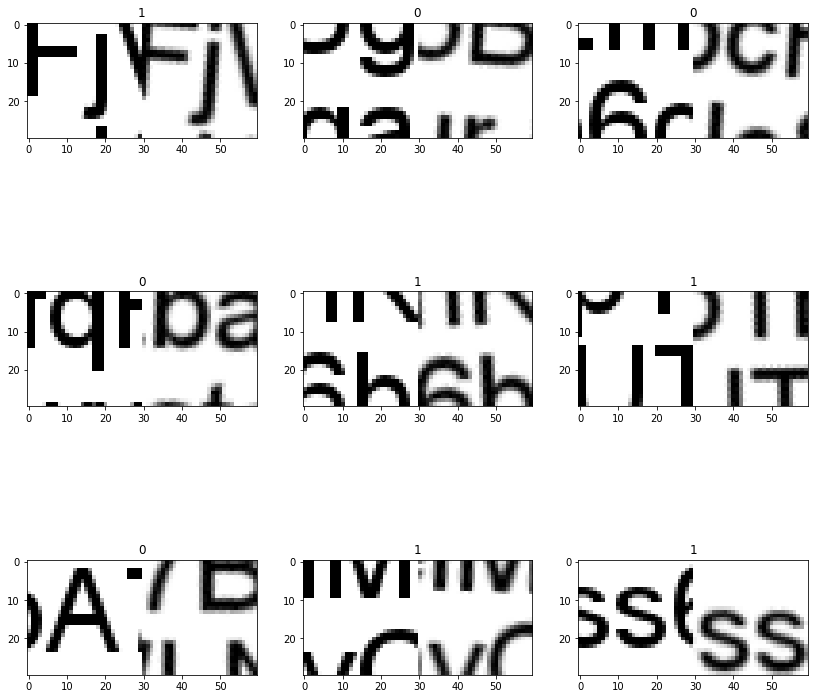

In [26]:
def draw():
    plt.figure(figsize=(14, 14))
    for i in range(1, 10):
        plt.subplot(3, 3, i)
        img = i-1
        plt.imshow(x_test[img, :, :, 0], cmap = plt.get_cmap('gray')) 
        plt.title(y_test[img])
        
draw()

In [27]:
model.predict(x_test[:9])

array([[ 0.74455607],
       [ 0.82753736],
       [ 0.61272448],
       [ 0.72625071],
       [ 0.82653803],
       [ 0.79881948],
       [ 0.10138538],
       [ 0.72446555],
       [ 0.38579318]], dtype=float32)